<a href="https://colab.research.google.com/github/Afag-Ramazanova/Explainable_ML_II/blob/main/Explainable_ML_ll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

In [4]:
pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-w61jddg8/alepython_499a22dccaa442cb891b90d8c4ac2dfb
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-w61jddg8/alepython_499a22dccaa442cb891b90d8c4ac2dfb
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.3 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350ab6-py3-none-any.whl size=15251 sha256=a2dd0268169cc6ab602ad9a54a66e524cf8166329a3a1d13fc9268285ba3be3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-yv7rm3_d/wheels/87/54/8b/9357059e0e9ade0ea889a30fe56beaed44312e07475133b2cc
Successfully built alepython


In [5]:
from alepython import ale_plot

In [7]:
credit = fetch_openml(name="credit-g", version=1, as_frame=True)
df = credit.frame.copy()
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [8]:
df["target"] = (df["class"] == "good").astype(int)
df.drop(columns=["class"], inplace=True)


In [9]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("target")  # remove target

categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessing: numeric -> impute mean + scale; categorical -> impute most freq + one-hot
numeric_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore")),
    ]
)

pre = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, numeric_cols),
        ("cat", categorical_pipe, categorical_cols),
    ]
)

clf = GradientBoostingClassifier(random_state=42)

pipe = Pipeline(steps=[("pre", pre), ("model", clf)])

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['checking_status',
                                                   'credit_history', 'purpose',
                                                   'savings_status',
                                                   'employment',
                                                   'personal_status',
                                                   'other_parties',
                                                   'property_magnitude',
                                                   'other_payment_plans',
                                                   'housing', 'job',
                                                   'own_telephone',
                                                   'foreign_worker'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

In [11]:
y_proba = pipe.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)
print("\n=== Test Performance ===")
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_proba).round(3))


=== Test Performance ===
              precision    recall  f1-score   support

           0      0.611     0.550     0.579        60
           1      0.815     0.850     0.832       140

    accuracy                          0.760       200
   macro avg      0.713     0.700     0.706       200
weighted avg      0.754     0.760     0.756       200

ROC AUC: 0.773


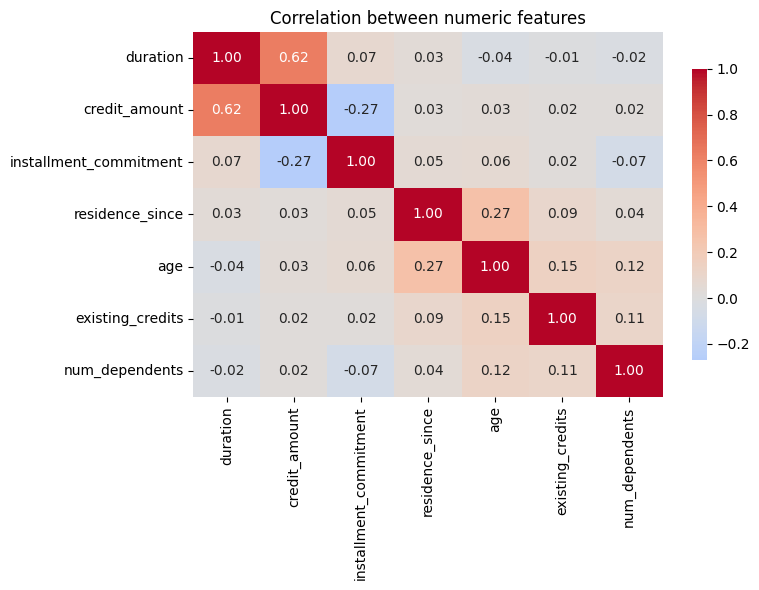

In [12]:

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[numeric_cols].corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation between numeric features")
plt.tight_layout()
plt.show()


Based on the results, several insights emerge from the correlation analysis and the interpretability plots. The correlation heatmap shows that most features are relatively independent, with the exception of a moderate positive correlation of about 0.62 between loan duration and credit amount. This suggests that applicants who borrow larger sums also tend to request longer repayment periods. Since PDP assumes independence among features, this correlation indicates that partial dependence results for duration and credit amount may overstate their effects, which makes it useful to look at ICE plots to better capture variation across individuals

In [13]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.values.sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    # Bias correction (Bergsma 2013)
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    denom = min((kcorr - 1), (rcorr - 1))
    return np.sqrt(phi2corr / denom) if denom > 0 else 0.0

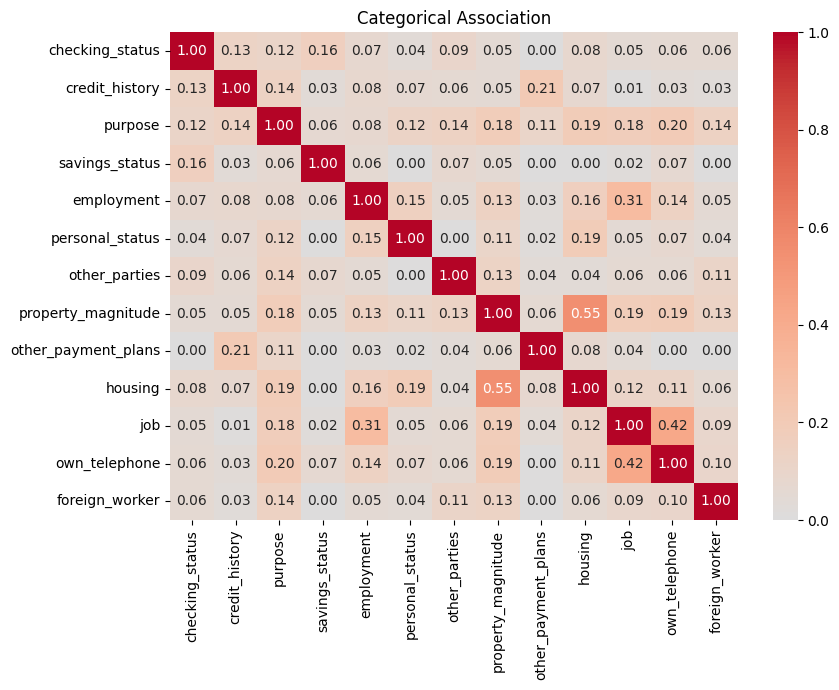

In [14]:

cat = df[categorical_cols].copy()
for c in cat.columns:
    cat[c] = cat[c].astype(str)
M = pd.DataFrame(
    np.ones((len(categorical_cols), len(categorical_cols))),
    index=categorical_cols,
    columns=categorical_cols,
)
for i, ci in enumerate(categorical_cols):
    for j, cj in enumerate(categorical_cols):
        if i < j:
            v = cramers_v(cat[ci], cat[cj])
            M.loc[ci, cj] = v
            M.loc[cj, ci] = v

plt.figure(figsize=(9, 7))
sns.heatmap(M, cmap = "coolwarm" , center=0, annot=True, fmt=".2f")
plt.title("Categorical Association")
plt.tight_layout()
plt.show()

#### Above code generated by ChatGPT on 25 September

## PDP plot

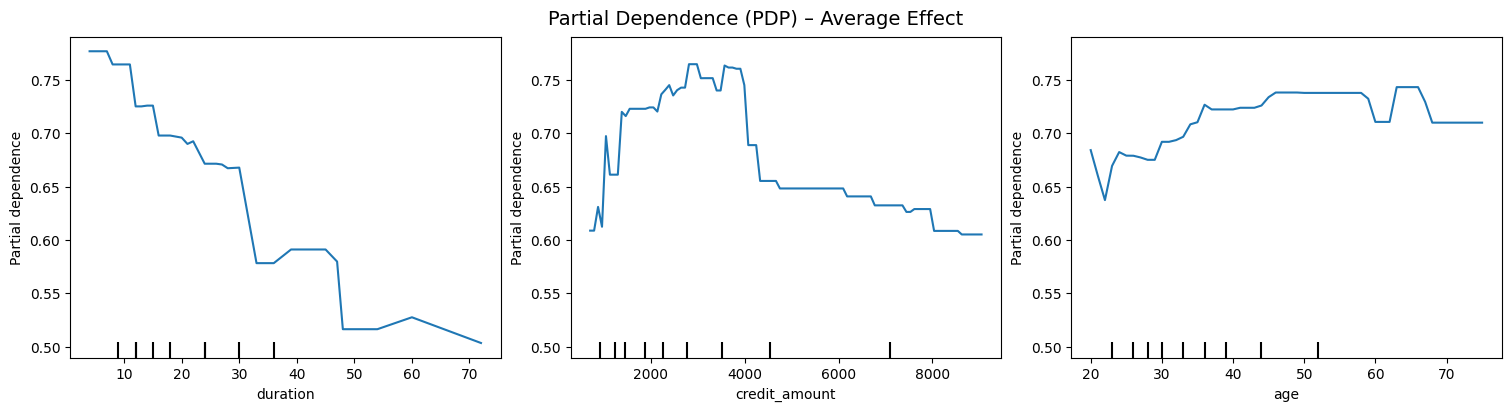

In [15]:
plot_features = ["duration", "credit_amount", "age"]

# PDP (average)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    pipe, X_train, features=plot_features, kind="average", ax=ax
)
fig.suptitle("Partial Dependence (PDP) – Average Effect", fontsize=14)
plt.show()


### Observations:

The partial dependence plots provide the average effect of each feature on loan approval probability. `Duration` exhibits a steady downward trend, meaning that longer repayment periods are associated with lower approval chances, consistent with the idea that lenders view extended terms as riskier. `Credit amount` shows a non linear pattern where moderate loan sizes are more favorable, but very high amounts lead to a sharp decline in approval probability. `Age` demonstrates only a mild effect,  approval probability increases slightly up to middle age around forty to fifty years old, and then stabilizes suggesting that age is not a strong predictor once applicants pass a certain threshold.

## ICE plots

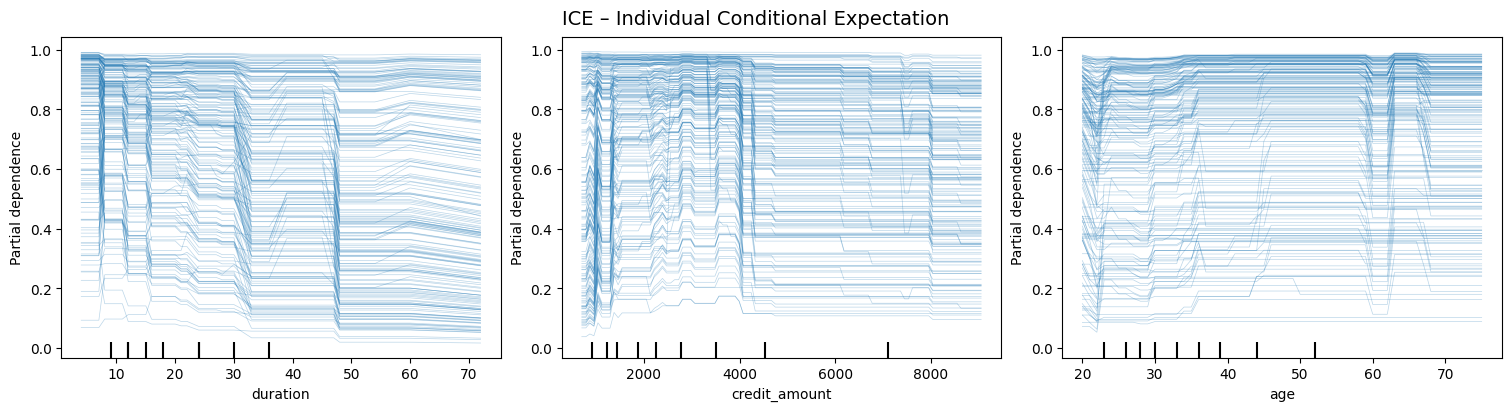

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    pipe, X_train, features=plot_features, kind="individual", ax=ax, subsample=200, random_state=42
)
fig.suptitle("ICE – Individual Conditional Expectation", fontsize=14)
plt.show()


## ICE plot and the PDP overlayed on top

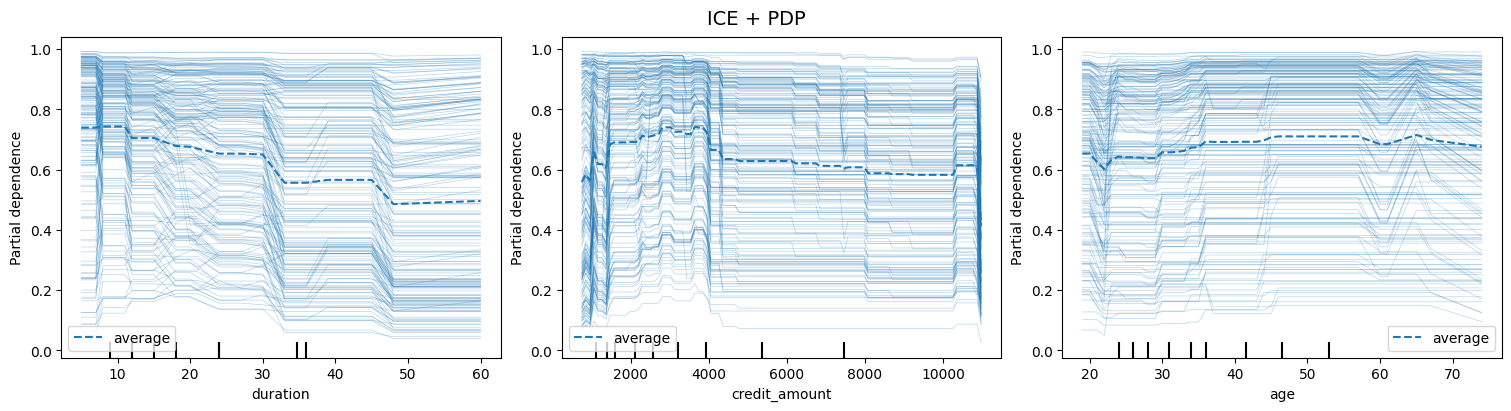

In [17]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(pipe, X_test, plot_features, kind='both', ax=ax, subsample=200, random_state=42) #kind='both'
fig.suptitle("ICE + PDP", fontsize=14)
plt.show()



### Observations
When examining ICE plots overlaid with PDP, more nuanced dynamics appear. For duration, while the PDP line confirms the average decline, the ICE curves show that not all individuals follow this trend, some applicants with long durations still maintain relatively high approval probabilities reflecting interactions with other features such as income or credit history. For credit amount, the ICE lines reveal sharper drops for some individuals than the PDP suggests, particularly when requested amounts exceed five thousand, showing that approval decisions depend strongly on personal profiles rather than on amount alone. Age shows a similar story: while the PDP indicates a stable or slightly positive effect, the ICE lines highlight cases where older applicants experience flat or even negative responses, again pointing to interactions with other features.


Overall the analysis shows that while the PDP plots tell a clear average story longer durations and larger amounts reduce approval chances, and age has a modest effect the ICE plots demonstrate that these effects are not uniform. Some applicants deviate significantly from the average, especially in relation to credit amount and age. Combined with the moderate correlation between duration and credit amount, these results highlight that interpretation of PDP alone may be misleading, and individual-level variation needs to be considered for a more accurate understanding of model behavior.

In [18]:
def predict_proba_class1(X_df):
    # X_df is a pandas DataFrame with raw columns (same columns as X_train)
    return pipe.predict_proba(X_df)[:, 1]

In [19]:
import sys
!{sys.executable} -m pip install pyALE

### ALE

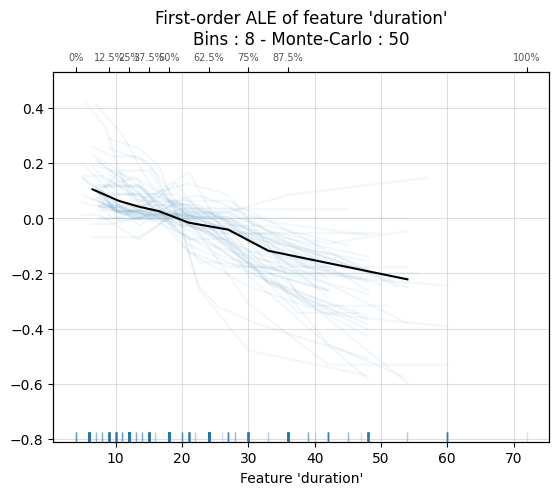

In [26]:
ale_plot(pipe, X_train,'duration', monte_carlo=True)
plt.show()

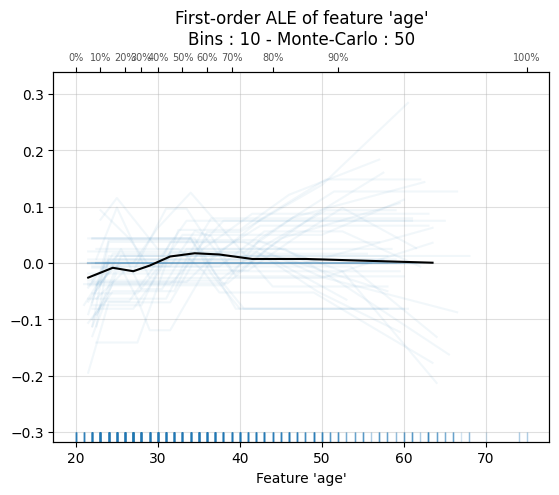

In [27]:
ale_plot(pipe, X_train,'age', monte_carlo=True)
plt.show()

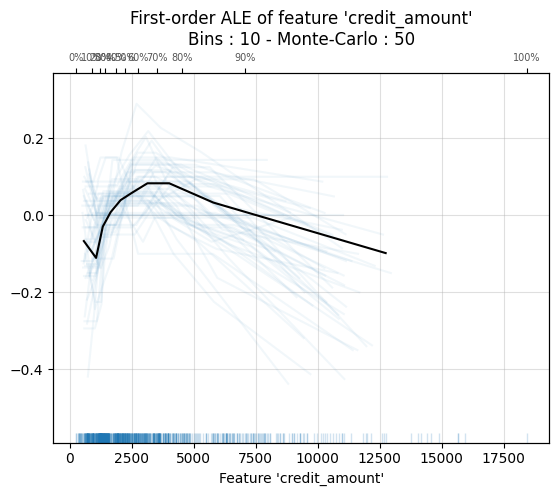

In [28]:
ale_plot(pipe, X_train,'credit_amount', monte_carlo=True)
plt.show()

For `duration`, the ALE plot shows a clear negative relationship. As loan duration increases, the accumulated local effect steadily decreases, indicating that longer repayment terms are associated with lower predicted approval probabilities. The decline is gradual but consistent, which reinforces the idea that extended repayment periods are riskier for lenders.

For `age`, the ALE curve is almost flat with only very small fluctuations around zero. This suggests that age has only a marginal influence on loan approval in this model. While the PDP had shown a slight increase in approval probability up to middle age, the ALE results indicate that once correlations and local effects are accounted for, age is not a strong driver of the outcome.

For `credit_amount`, the ALE plot shows a non-linear relationship. At very low amounts, the effect starts negative, then rises into positive territory as credit amounts reach moderate levels (around 2500–5000). Beyond that range, the accumulated effect declines steadily, turning negative again for very high loan amounts. This indicates that moderate loan requests are associated with higher approval probabilities, while very small and very large requests reduce the chance of approval.

### Differences Between PDP and ALE

The PDP plots showed broad, smooth patterns: duration decreasing approval, credit amount gradually reducing approval after a certain point and age having a weak but slightly positive effect. ALE, however, adjusts for correlations between features and focuses only on regions of the data where observations actually exist. As a result, it reveals more nuanced local effects.

For duration, both PDP and ALE agree on the negative relationship, but ALE shows a more reliable monotonic decrease rather than the exaggerated step like drops seen in the PDP. For age, PDP suggested a mild upward trend in approval probability up to middle age, but ALE shows that this effect nearly disappears once correlations are controlled, suggesting PDP may have overstated the role of age. For credit amount, PDP showed a smoother decline as the requested amount increased, whereas ALE uncovers a clear “hump-shaped” pattern where moderate amounts are favored and both extremes are penalized.

*Chatgpt helped to polish the wordings for this explanation on 29 September*.